# ALUNOS: 

- Aluno1: Arthur de Barros Marcondes Machado Rosisca
- Aluno2: Vinicius Fonseca Navarro



# CIÊNCIA DE DADOS

## Etapas previstas para realizar Análise e Tratamento de Dados:
- Importar as bibliotecas necessárias 
- Importar a base de dado e realizar o merge, caso necessário
- Tratamento dos Dados
- Visualização dos dados
- Verificar a base estatística dos dados numéricos e não numéricos
- Verificar as colunas categóricas
- Análise da base de dados
- Conclusões obtidas

## Análise de Perfil de risco de Beneficiários

O desafio consiste na **análise de perfil de risco de beneficiários com predição, analise de custo evitado e alertas de possíveis candidatos a doenças crônicas**, segundo a Portaria nº 483, de 1º de abril de 2014, as doenças crônicas são aquelas que apresentam início gradual, com duração longa ou incerta, que, em geral, apresentam múltiplas causas e cujo tratamento envolva mudanças de estilo de vida, em um processo de cuidado contínuo. Segundo a OMS as principais doenças crônicas não transmissíveis, (DCNT), um exemplo são:
- Doenças cerebrovasculares
- Doenças cardiovasculares
- Diabetes mellitus
- Doenças respiratórias crônicas (asma)
- Neoplasias (câncer)
- Obesidade
- Hipertensão

Na Unimed Ponta Grossa, temos o programa de acompanhamento linha de cuidado, em que os beneficiários identificados com as DCNT são acompanhados.

Para as análises e ETLs serão disponibilizadas informações referentes a utilização do plano de saúde por todos os beneficiários, procedimentos executados, dados do perfil de usuário, entradas em pronto atendimento e internação (em uma base separada para ser relacionada por id de pessoa). Também serão indicados os pacientes que já possuem diagnóstico de DCNT e já são acompanhados pela equipe de linha e cuidado e o tempo de acompanhamento. 

O **objetivo** é construir um modelo capaz calcular o custo evitado dos pacientes que estão no programa, identificar pacientes com maior probabilidade de desenvolver DCTNs ou que já possam estar com alguma DCNTs e não fazem parte da nossa linha de cuidado, com base em seus perfis e históricos médicos.

Resultados Esperados:
- Tratamento das informações
- Relacionamento entre o Datasets
- Identificação de padrões para cada grupo
- Alertas de possíveis pacientes com DCNTs
- Predição de possíveis casos:
- Resultado de custo Evitado (custo do paciente antes de entrar no programa e após a entrada no programa)
- Predição de custo evitado de pacientes que ainda não fazem parte do programa
Bônus: outras analises não indicadas acima
**Obs: na analise de custo evitado, levar em conta a correção monetária dos anos anteriores
 
Dados Gerais
- ID de usuário
- Data de nascimento
- Sexo
- Peso
- Número de Gestações
- Grau de dependência (Se Titular)
- Contratante
- Tipo de Plano
- Procedimentos Realizados
- Data do procedimento
- Especialidade do executante
- Especialidade do solicitante
- Paciente faz parte da linha de cuidado
- Programa que o paciente faz parte

Dados de PA e Internação (somente Beneficiários):
- ID do atendimento
- Data/hora da entrada
- Procedimento principal do atendimento
- CID
- Queixa
- Observação
- Clínica (tipo de atendimento)
- Especialidade Médico Responsável
- Classificação de Risco (Manchester)
- Data/hora da Internação
- Motivo da Alta
- Data da alta

## Importar as bibliotecas necessárias e a base de dados. Realizar o merge, caso necessário e Realizar a visualização da mesma 

In [3]:
# Importar as bibliotecas
import pandas as pd
import numpy as np 
import os
from datetime import datetime
diretorio_atual = os.getcwd()
print(f"O Jupyter está rodando a partir de: {diretorio_atual}")

O Jupyter está rodando a partir de: /home/arthur/Documents/FACULDADE/TOPICOS EM PROGRAMACAO 2/trabBrowser


### Importar a base de dados

In [4]:
print("=== INICIANDO CARREGAMENTO DOS DADOS ===")
path_hospital = 'Dados/Hospital/'
path_linha_cuidado = 'Dados/Linha de cuidado/'
path_plano_saude = 'Dados/Plano de Saúde/'
path_geral = 'Dados/'

arquivos_a_carregar = {
    'df_atend_hgu_cid': path_hospital + 'atendimento_hgu_cid.xlsx',
    'df_atend_hgu': path_hospital + 'atendimento_hgu.xlsx',
    'df_paciente_hgu': path_hospital + 'paciente_hgu.xlsx',
    'df_proc_atend_hgu': path_hospital + 'procedimento_atendimento_hgu.xlsx',
    'df_cid_linha_cuidado': path_linha_cuidado + 'cid_linha_cuidado.xlsx',
    'df_proc_linha_cuidado': path_linha_cuidado + 'procedimento_linha_cuidado.xlsx',
    'df_benef_proc_plano': path_plano_saude + 'beneficiario_custo_procedimento_plano_de_saude.xlsx',
    'df_beneficiarios_plano': path_plano_saude + 'beneficiarios.xlsx',
    'df_procedimento_geral': path_geral + 'procedimento.xlsx'
}
dataframes = {}
for nome, caminho in arquivos_a_carregar.items():
    try:
        dataframes[nome] = pd.read_excel(caminho)
        print(f"✓ Arquivo '{caminho}' carregado com sucesso como '{nome}'.")
    except FileNotFoundError:
        print(f"✗ ERRO: Arquivo não encontrado em '{caminho}'.")
        exit()
    except Exception as e:
        print(f"✗ ERRO ao carregar '{caminho}': {e}")
        exit()
print("\n=== DADOS CARREGADOS COM SUCESSO ===\n")

=== INICIANDO CARREGAMENTO DOS DADOS ===
✓ Arquivo 'Dados/Hospital/atendimento_hgu_cid.xlsx' carregado com sucesso como 'df_atend_hgu_cid'.
✓ Arquivo 'Dados/Hospital/atendimento_hgu.xlsx' carregado com sucesso como 'df_atend_hgu'.
✓ Arquivo 'Dados/Hospital/paciente_hgu.xlsx' carregado com sucesso como 'df_paciente_hgu'.
✓ Arquivo 'Dados/Hospital/procedimento_atendimento_hgu.xlsx' carregado com sucesso como 'df_proc_atend_hgu'.
✓ Arquivo 'Dados/Linha de cuidado/cid_linha_cuidado.xlsx' carregado com sucesso como 'df_cid_linha_cuidado'.
✓ Arquivo 'Dados/Linha de cuidado/procedimento_linha_cuidado.xlsx' carregado com sucesso como 'df_proc_linha_cuidado'.
✓ Arquivo 'Dados/Plano de Saúde/beneficiario_custo_procedimento_plano_de_saude.xlsx' carregado com sucesso como 'df_benef_proc_plano'.
✓ Arquivo 'Dados/Plano de Saúde/beneficiarios.xlsx' carregado com sucesso como 'df_beneficiarios_plano'.
✓ Arquivo 'Dados/procedimento.xlsx' carregado com sucesso como 'df_procedimento_geral'.

=== DADOS CA

### Limpeza e pré-processamento dos dados

## Correção de tipos de dados

In [5]:
print("=== INICIANDO LIMPEZA E PRÉ-PROCESSAMENTO ===")
# 1. Correção de Tipos de Dados (Datas)
dataframes['df_atend_hgu_cid']['dt_diagnostico'] = pd.to_datetime(dataframes['df_atend_hgu_cid']['dt_diagnostico'], errors='coerce')
dataframes['df_atend_hgu']['dt_entrada'] = pd.to_datetime(dataframes['df_atend_hgu']['dt_entrada'], errors='coerce')
dataframes['df_atend_hgu']['dt_alta'] = pd.to_datetime(dataframes['df_atend_hgu']['dt_alta'], errors='coerce')
dataframes['df_paciente_hgu']['dt_nascimento'] = pd.to_datetime(dataframes['df_paciente_hgu']['dt_nascimento'], errors='coerce')
dataframes['df_paciente_hgu']['dt_obito'] = pd.to_datetime(dataframes['df_paciente_hgu']['dt_obito'], errors='coerce')
dataframes['df_proc_atend_hgu']['dt_item'] = pd.to_datetime(dataframes['df_proc_atend_hgu']['dt_item'], errors='coerce')
dataframes['df_benef_proc_plano']['dt_item'] = pd.to_datetime(dataframes['df_benef_proc_plano']['dt_item'], errors='coerce')
print("=== PROCESSO CONCLUIDO ===")

=== INICIANDO LIMPEZA E PRÉ-PROCESSAMENTO ===


/tmp/ipykernel_27809/3007726937.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframes['df_paciente_hgu']['dt_obito'] = pd.to_datetime(dataframes['df_paciente_hgu']['dt_obito'], errors='coerce')


=== PROCESSO CONCLUIDO ===


## Remover colunas com excesso de nulos

In [6]:
# 2. Remover Colunas com Excesso de Nulos
dataframes['df_atend_hgu'] = dataframes['df_atend_hgu'].drop(columns=['ds_triagem', 'ds_queixa'])
dataframes['df_benef_proc_plano'] = dataframes['df_benef_proc_plano'].drop(columns=['ds_especialidade_executor'])

## Substituir valores sentinela e corrigir outliers

In [7]:
# 3. Substituir Valores Sentinela e Corrigir Outliers
for col in ['qt_imc', 'qt_altura_cm', 'qt_peso']:
    dataframes['df_paciente_hgu'][col] = dataframes['df_paciente_hgu'][col].replace(-1.0, np.nan)
dataframes['df_paciente_hgu'].loc[dataframes['df_paciente_hgu']['qt_altura_cm'] > 250, 'qt_altura_cm'] = np.nan
dataframes['df_proc_atend_hgu'].loc[dataframes['df_proc_atend_hgu']['qt_item'] < 0, 'qt_item'] = np.nan
print("✓ Processo de limpeza concluído.")
print("\n=== LIMPEZA CONCLUÍDA ===\n")

✓ Processo de limpeza concluído.

=== LIMPEZA CONCLUÍDA ===



### Unificação dos dados

In [8]:
print("=== INICIANDO UNIFICAÇÃO DOS DADOS ===")

# 1. Agregar dados do plano de saúde por beneficiário
print("\n--- 1. Agregando dados do plano de saúde...")
df_plano_agg = dataframes['df_benef_proc_plano'].groupby('id_beneficiario').agg(
    total_custo_plano=('vl_item', 'sum'),
    num_procedimentos_plano=('id_item', 'count')
).reset_index()
print("✓ Dados do plano agregados.")

# 2. Agregar dados de atendimento hospitalar por paciente
print("\n--- 2. Agregando dados de atendimento hospitalar...")
df_hospital_agg = dataframes['df_atend_hgu'].groupby('id_paciente').agg(
    num_atendimentos_hosp=('nr_atendimento', 'nunique'), # nunique para contar atendimentos únicos
    tempo_total_internacao_dias=('dt_alta', lambda x: (x.max() - x.min()).days)
).reset_index()
print("✓ Dados hospitalares agregados.")

=== INICIANDO UNIFICAÇÃO DOS DADOS ===

--- 1. Agregando dados do plano de saúde...
✓ Dados do plano agregados.

--- 2. Agregando dados de atendimento hospitalar...
✓ Dados hospitalares agregados.


## Descartas as duplicadas do merge

In [9]:
# 3. Preparar a tabela de pacientes para o merge
# A tabela df_paciente_hgu é a nossa "ponte" entre o id_beneficiario e o id_paciente
# Descartas as duplicadas
df_pacientes = dataframes['df_paciente_hgu'][['id_beneficiario', 'id_paciente', 'dt_nascimento', 'cd_sexo']].drop_duplicates()

### Construir a Tabela Master

In [10]:
# 4. Construir a Tabela Master
print("\n--- 3. Construindo a tabela master (df_master)...")
# Começamos com a lista de todos os beneficiários
df_master = dataframes['df_beneficiarios_plano']

# Merge com os dados dos pacientes (para pegar id_paciente, dt_nascimento, etc)
# Usamos 'left' para manter todos os beneficiários, mesmo que não tenham dados de paciente no HGU
df_master = pd.merge(df_master, df_pacientes, on='id_beneficiario', how='left')
print("... merged com dados de pacientes")

# Merge com os dados agregados do plano
df_master = pd.merge(df_master, df_plano_agg, on='id_beneficiario', how='left')
print("... merged com dados agregados do plano")

# Merge com os dados agregados do hospital (usando a 'ponte' id_paciente)
df_master = pd.merge(df_master, df_hospital_agg, on='id_paciente', how='left')
print("... merged com dados agregados do hospital")
print("✓ Tabela Master criada com sucesso!")


--- 3. Construindo a tabela master (df_master)...
... merged com dados de pacientes
... merged com dados agregados do plano
... merged com dados agregados do hospital
✓ Tabela Master criada com sucesso!


### Engenharia de Features e tratamento de dados

In [11]:
# 5. Engenharia de Features Adicional
print("\n--- 4. Realizando engenharia de features adicional...")
# Calcular a idade a partir da data de nascimento
# Usamos uma data de referência para o cálculo, por exemplo, a data de hoje.
data_referencia = datetime.now()
df_master['idade_calculada'] = (data_referencia - df_master['dt_nascimento']).dt.days / 365.25


--- 4. Realizando engenharia de features adicional...


## Preencher valores nulos que surgiram nos merges (pacientes sem custos ou atendimentos)

In [12]:
# Preencher valores nulos que surgiram nos merges (pacientes sem custos ou atendimentos)
df_master['total_custo_plano'] = df_master['total_custo_plano'].fillna(0)
df_master['num_procedimentos_plano'] = df_master['num_procedimentos_plano'].fillna(0)
df_master['num_atendimentos_hosp'] = df_master['num_atendimentos_hosp'].fillna(0)
print("✓ Novas features criadas e valores nulos tratados.")

✓ Novas features criadas e valores nulos tratados.


In [13]:
# 6. Salvar o resultado final
print("\n--- 5. Salvando a tabela master...")
output_path = 'Resultados/'
if not os.path.exists(output_path):
    os.makedirs(output_path)

final_csv_path = os.path.join(output_path, 'master_beneficiarios.csv')
df_master.to_csv(final_csv_path, index=False, sep=';', decimal=',')
print("✓ Tabela Master salva com sucesso em: {final_csv_path}")


--- 5. Salvando a tabela master...
✓ Tabela Master salva com sucesso em: {final_csv_path}


In [14]:
# Visualizar a base de dados
print("\n--- Amostra da Tabela Master Final ---")
print(df_master.head())
print("\n--- Informações da Tabela Master Final ---")
df_master.info()

print("\n=== PROCESSO CONCLUÍDO ===")


--- Amostra da Tabela Master Final ---
   id_beneficiario  nr_contrato  id_plano               ds_plano  \
0           143274     15796120        10  FAMILIAR - REFERÊNCIA   
1           138347      4259520        10  FAMILIAR - REFERÊNCIA   
2           140363      8823420        10  FAMILIAR - REFERÊNCIA   
3           143358     16054720        10  FAMILIAR - REFERÊNCIA   
4           168425     38214020        10  FAMILIAR - REFERÊNCIA   

  ds_formacao_preco  id_familia  qt_idade    ds_sexo ds_estado_civil  \
0  Pré-estabelecido       55250      54.0   Feminino        Solteiro   
1  Pré-estabelecido       21906      57.0   Feminino          Casado   
2  Pré-estabelecido       34830      61.0   Feminino          Casado   
3  Pré-estabelecido       55739      47.0   Feminino          Casado   
4  Pré-estabelecido      137215      13.0  Masculino        Solteiro   

  ds_parentesco  id_paciente dt_nascimento cd_sexo  total_custo_plano  \
0       Titular     666333.0    1970-10-15   

## Tratamento dos dados: verificar e corrigir o domínios dos campos, se há dados faltantes, verificar cardinalidade, identificar colunas categóricas, de visualizar as informações estatísticas da base (dados numéricos e não numéricos)

### Importação das Bibliotecas de Modelagem


In [15]:
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Resumo das bases

In [16]:
# Resumo das bases
print("=== RESUMO DAS BASES DE DADOS ===")
for nome, df in dataframes.items():
    print(f"\n{nome}:")
    print(f"Shape: {df.shape}")
    print(f"Colunas: {df.columns.tolist()}")
    print(f"Tipos de dados:\n{df.dtypes}")
    print(f"Valores nulos:\n{df.isnull().sum()}")

=== RESUMO DAS BASES DE DADOS ===

df_atend_hgu_cid:
Shape: (11031, 6)
Colunas: ['nr_atendimento', 'cd_doenca', 'dt_diagnostico', 'ds_classificacao_diagnostico', 'ds_linha_cuidado', 'id_linha_cuidado']
Tipos de dados:
nr_atendimento                           int64
cd_doenca                               object
dt_diagnostico                  datetime64[ns]
ds_classificacao_diagnostico            object
ds_linha_cuidado                        object
id_linha_cuidado                         int64
dtype: object
Valores nulos:
nr_atendimento                  0
cd_doenca                       0
dt_diagnostico                  0
ds_classificacao_diagnostico    0
ds_linha_cuidado                0
id_linha_cuidado                0
dtype: int64

df_atend_hgu:
Shape: (712891, 9)
Colunas: ['nr_atendimento', 'cd_estabelecimento', 'id_paciente', 'dt_entrada', 'dt_alta', 'ds_especialidade_medico_responsavel', 'ds_motivo_alta', 'ds_tipo_atendimento', 'ds_clinica']
Tipos de dados:
nr_atendimento      

### Iniciando etapa de modelagem

In [17]:
print("=== INICIANDO ETAPA DE MODELAGEM: CRIAÇÃO DE PERFIS DE RISCO ===")

# --- 1. Carregar os Dados Limpos ---
# Carregamos diretamente o arquivo CSV mestre que foi gerado no script anterior.
input_file = 'Resultados/master_beneficiarios.csv'
try:
    df_master = pd.read_csv(input_file, sep=';', decimal=',')
    print(f"✓ Arquivo mestre '{input_file}' carregado com sucesso.")
except FileNotFoundError:
    print(f"✗ ERRO: Arquivo '{input_file}' não encontrado. Execute o script de preparação de dados primeiro.")
    exit()


=== INICIANDO ETAPA DE MODELAGEM: CRIAÇÃO DE PERFIS DE RISCO ===
✓ Arquivo mestre 'Resultados/master_beneficiarios.csv' carregado com sucesso.


### Domínios incorretos, caso existam

In [18]:
# Verificar domínios incorretos
print("=== VERIFICAÇÃO DE DOMÍNIOS ===")

# Verificar valores únicos em colunas categóricas
colunas_categoricas = ['ds_sexo', 'ds_estado_civil', 'ds_parentesco', 'ds_plano', 'ds_formacao_preco']
for col in colunas_categoricas:
    if col in df_master.columns:
        print(f"\nValores únicos em {col}:")
        print(df_master[col].value_counts())

=== VERIFICAÇÃO DE DOMÍNIOS ===

Valores únicos em ds_sexo:
ds_sexo
Masculino    56593
Feminino     56038
Name: count, dtype: int64

Valores únicos em ds_estado_civil:
ds_estado_civil
Solteiro                     64791
Casado                       40885
Concubinato/União Estável     4497
Divorciado                    1051
Viúvo                          842
Outros                         272
Separado                       266
Desquitado                       8
Name: count, dtype: int64

Valores únicos em ds_parentesco:
ds_parentesco
Titular                56331
Filho (a)              30316
Cônjuge                20199
Filho (a) estudante     2931
Companheiro (a)         1408
Enteado (a)              416
Outros Dependentes       332
Filho (a) PNE            221
Pai                      192
Filho (a) adotivo        137
Neto (a)                  61
Irmão                     41
Sogro (a)                 34
Nora                      13
Agregados                  5
Irmã                       

### Tratamento das colunas categóricas

In [19]:
# --- 2. Preparação dos Dados para o Modelo (Pré-processamento) ---
print("\n--- 2. Preparando dados para o modelo...")

# Selecionar as 'features' (características) que usaremos para criar os clusters.
# Excluímos IDs e colunas de texto que não serão usadas diretamente.
features_numericas = [
    'qt_idade', 
    'idade_calculada',
    'total_custo_plano', 
    'num_procedimentos_plano', 
    'num_atendimentos_hosp'
]
features_categoricas = [
    'ds_sexo', 
    'ds_estado_civil',
    'ds_parentesco'
]


--- 2. Preparando dados para o modelo...


### Tratamento dos valores nulos, caso existam


In [20]:
# Lidar com valores nulos restantes. Para simplicidade, preenchemos com a mediana ou a moda.
for col in features_numericas:
    if df_master[col].isnull().any():
        mediana = df_master[col].median()
        df_master[col] = df_master[col].fillna(mediana)

for col in features_categoricas:
    if df_master[col].isnull().any():
        moda = df_master[col].mode()[0]
        df_master[col].fillna(moda, inplace=True)

/tmp/ipykernel_27809/2670115440.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master[col].fillna(moda, inplace=True)


### Cardinalidade dos dados

In [21]:
# Verificar cardinalidade
print("=== VERIFICAÇÃO DE CARDINALIDADE ===")

# Calcular cardinalidade para cada coluna
for col in df_master.columns:
    cardinalidade = df_master[col].nunique()
    print(f"{col}: {cardinalidade} valores únicos")

=== VERIFICAÇÃO DE CARDINALIDADE ===
id_beneficiario: 112646 valores únicos
nr_contrato: 14633 valores únicos
id_plano: 264 valores únicos
ds_plano: 124 valores únicos
ds_formacao_preco: 2 valores únicos
id_familia: 56346 valores únicos
qt_idade: 105 valores únicos
ds_sexo: 2 valores únicos
ds_estado_civil: 8 valores únicos
ds_parentesco: 19 valores únicos
id_paciente: 74376 valores únicos
dt_nascimento: 25485 valores únicos
cd_sexo: 2 valores únicos
total_custo_plano: 21749 valores únicos
num_procedimentos_plano: 188 valores únicos
num_atendimentos_hosp: 88 valores únicos
tempo_total_internacao_dias: 855 valores únicos
idade_calculada: 25485 valores únicos


### Tratamento dos valores duplicados, caso existam

In [22]:
# Verificar e tratar duplicados
print("=== VERIFICAÇÃO DE DUPLICADOS ===")

# Verificar duplicados antes
print("\nQuantidade de linhas duplicadas antes:", df_master.duplicated().sum())

# Remover duplicados
df_master = df_master.drop_duplicates()

# Verificar duplicados depois
print("Quantidade de linhas duplicadas depois:", df_master.duplicated().sum())

=== VERIFICAÇÃO DE DUPLICADOS ===

Quantidade de linhas duplicadas antes: 0
Quantidade de linhas duplicadas depois: 0


### Excluir linhas e colunas desnecessárias

In [23]:
## feita em etapa anterior

### Verificando informações estatísticas da base

In [24]:
# Para dados numéricos
print("=== INFORMAÇÕES ESTATÍSTICAS - DADOS NUMÉRICOS ===")
colunas_numericas = ['idade_calculada', 'total_custo_plano', 'num_procedimentos_plano', 
                     'num_atendimentos_hosp', 'tempo_total_internacao_dias']
print(df_master[colunas_numericas].describe())

=== INFORMAÇÕES ESTATÍSTICAS - DADOS NUMÉRICOS ===
       idade_calculada  total_custo_plano  num_procedimentos_plano  \
count    112646.000000      112646.000000             112646.00000   
mean         34.276184         284.233603                  3.82801   
std          16.090732        2194.519783                 12.68893   
min           0.123203           0.000000                  0.00000   
25%          28.109514           0.000000                  0.00000   
50%          34.146475           0.000000                  0.00000   
75%          40.060233         125.000000                  1.00000   
max         103.192334      350069.580000               1603.00000   

       num_atendimentos_hosp  tempo_total_internacao_dias  
count          112646.000000                 64959.000000  
mean                3.571880                   348.495974  
std                 5.908857                   283.892301  
min                 0.000000                     0.000000  
25%               

In [25]:
# Para dados não numéricos
print("\n=== INFORMAÇÕES ESTATÍSTICAS - DADOS CATEGÓRICOS ===")
for col in colunas_categoricas:
    print(f"\nDistribuição de {col}:")
    print(df_master[col].value_counts(normalize=True).head())


=== INFORMAÇÕES ESTATÍSTICAS - DADOS CATEGÓRICOS ===

Distribuição de ds_sexo:
ds_sexo
Masculino    0.50253
Feminino     0.49747
Name: proportion, dtype: float64

Distribuição de ds_estado_civil:
ds_estado_civil
Solteiro                     0.575475
Casado                       0.362951
Concubinato/União Estável    0.039922
Divorciado                   0.009330
Viúvo                        0.007475
Name: proportion, dtype: float64

Distribuição de ds_parentesco:
ds_parentesco
Titular                0.500071
Filho (a)              0.269126
Cônjuge                0.179314
Filho (a) estudante    0.026020
Companheiro (a)        0.012499
Name: proportion, dtype: float64

Distribuição de ds_plano:
ds_plano
COLETIVO EMPRESARIAL-UNIFAMILIA                           0.166033
COLETIVO EMPRESARIAL NACIONAL ENFERMARIA 30-20            0.159260
Coletivo Empresarial Municipal Rede Propria Enfermaria    0.087131
Coletivo Empresarial Regional Rede Propria Enfermaria     0.081459
COLETIVO EMPRESARIAL-

### Análise da base

## Criar um 'pipeline' de pré-processamento

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)
    ],
    remainder='passthrough' # Mantém outras colunas, se houver
)

# Aplicar o pré-processamento
X = df_master[features_numericas + features_categoricas]
X_processed = preprocessor.fit_transform(X)
print("✓ Dados pré-processados e prontos para o modelo.")

✓ Dados pré-processados e prontos para o modelo.


## Encontrar o Número Ideal de Clusters (Método do Cotovelo)


--- Encontrando o número ideal de clusters (K)...
✓ Gráfico do 'Método do Cotovelo' salvo em: Resultados/metodo_cotovelo.png


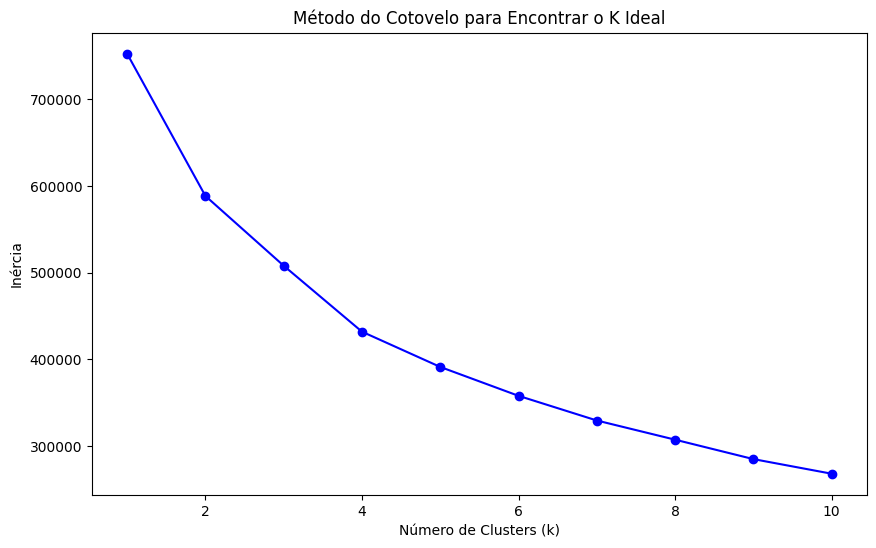

In [27]:
print("\n--- Encontrando o número ideal de clusters (K)...")
inertia = []
K_range = range(1, 11) # Testaremos de 1 a 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Encontrar o K Ideal')
elbow_path = 'Resultados/metodo_cotovelo.png'
plt.savefig(elbow_path)
print(f"✓ Gráfico do 'Método do Cotovelo' salvo em: {elbow_path}")

## Treinar o Modelo K-Means e Criar os Perfis

In [28]:
K_ideal = 4  # Baseado no gráfico do cotovelo
print(f"\n--- Treinando o modelo K-Means com K={K_ideal}...")
kmeans_final = KMeans(n_clusters=K_ideal, random_state=42, n_init=10)
kmeans_final.fit(X_processed)

# Adicionar os rótulos dos clusters de volta ao DataFrame original
df_master['perfil_risco'] = kmeans_final.labels_
print("✓ Modelo treinado e perfis de risco atribuídos a cada beneficiário.")


--- Treinando o modelo K-Means com K=4...
✓ Modelo treinado e perfis de risco atribuídos a cada beneficiário.


✓ Modelo treinado e perfis de risco atribuídos a cada beneficiário.


## Análise e Interpretação dos Perfis

In [29]:
print(f"\n--- Análise dos {K_ideal} Perfis de Risco Criados ---")

# Agrupar por perfil e calcular a média das características mais importantes
analise_perfis = df_master.groupby('perfil_risco')[features_numericas].mean().round(2)

# Adicionar a contagem de membros em cada perfil
analise_perfis['num_beneficiarios'] = df_master['perfil_risco'].value_counts()

print("Características médias de cada perfil:")
print(analise_perfis)


--- Análise dos 4 Perfis de Risco Criados ---
Características médias de cada perfil:
              qt_idade  idade_calculada  total_custo_plano  \
perfil_risco                                                 
0                39.04            37.89              77.97   
1                11.55            20.42             136.25   
2                38.47            39.37          130910.04   
3                55.82            56.34            1357.08   

              num_procedimentos_plano  num_atendimentos_hosp  \
perfil_risco                                                   
0                                1.12                   1.94   
1                                2.00                   2.93   
2                              420.24                  15.29   
3                               19.13                  11.86   

              num_beneficiarios  
perfil_risco                     
0                         59162  
1                         38809  
2                   

## Salvar a tabela de análise e a tabela mestre com os perfis

In [30]:
analise_path = 'Resultados/analise_perfis_risco.csv'
final_com_perfis_path = 'Resultados/master_com_perfis.csv'

analise_perfis.to_csv(analise_path, sep=';', decimal=',')
df_master.to_csv(final_com_perfis_path, index=False, sep=';', decimal=',')

print(f"\n✓ Análise dos perfis salva em: {analise_path}")
print(f"✓ Tabela final com os perfis salva em: {final_com_perfis_path}")
print("\n=== MODELAGEM CONCLUÍDA ===")


✓ Análise dos perfis salva em: Resultados/analise_perfis_risco.csv
✓ Tabela final com os perfis salva em: Resultados/master_com_perfis.csv

=== MODELAGEM CONCLUÍDA ===


### Conclusões obtidas

Perfil 0: "A População Geral"
Características: Este é o maior grupo, com idade média de 38 anos. O uso do plano é mínimo, com o menor custo médio de todos os grupos.
Conclusão do Perfil: Este grupo representa a "massa" de beneficiários adultos que são, em sua maioria, saudáveis e utilizam o plano de forma esporádica. Este é um perfil de risco baixo a moderado, que deve ser monitorado para ações de prevenção primária.

Perfil 1: "Jovens e Dependentes de Baixo Uso" 
Características: É o grupo mais jovem (idade média de 20 anos), com custos, procedimentos e atendimentos muito baixos. É o segundo maior grupo.
Conclusão do Perfil: Representa a população de dependentes (filhos), que são geralmente saudáveis e usam o plano para consultas e procedimentos de rotina ou de baixa complexidade. Este é um perfil de risco baixo.


Perfil 2: "Críticos de Altíssimo Custo" 🚑
Características: Um grupo muito pequeno (apenas 17 pessoas), mas com um impacto financeiro gigantesco. A idade é de 39 anos, mas o custo médio é astronômico (mais de R$ 130 mil), com uma quantidade massiva de procedimentos (420) e atendimentos.
Conclusão do Perfil: Este perfil representa os outliers de custo, os casos mais complexos e caros. Podem ser pacientes com câncer, em longas internações em UTI, ou que passaram por cirurgias de alta complexidade. Embora sejam poucos, consomem uma parcela desproporcional dos recursos. Este é um perfil de risco crítico, que necessita de gestão de caso intensiva e individualizada.

Perfil 3: "Crônicos com Uso Frequente" 🩺
Características: Este é o grupo mais velho (idade média de 56 anos). Embora o custo médio (R$ 1.357) não seja o mais alto, eles são usuários frequentes do sistema: têm um número elevado de procedimentos (19) e atendimentos hospitalares (12).
Conclusão do Perfil: Este é o perfil-alvo principal para os programas de "Linhas de Cuidado" da Unimed. São pacientes com doenças crônicas que necessitam de acompanhamento constante para evitar agudizações. O foco aqui é a gestão da saúde para prevenir que se tornem pacientes do Perfil 2. Este é um perfil de risco alto e gerenciável.

Gerando o Dashboard Principal de Análise de Perfis...


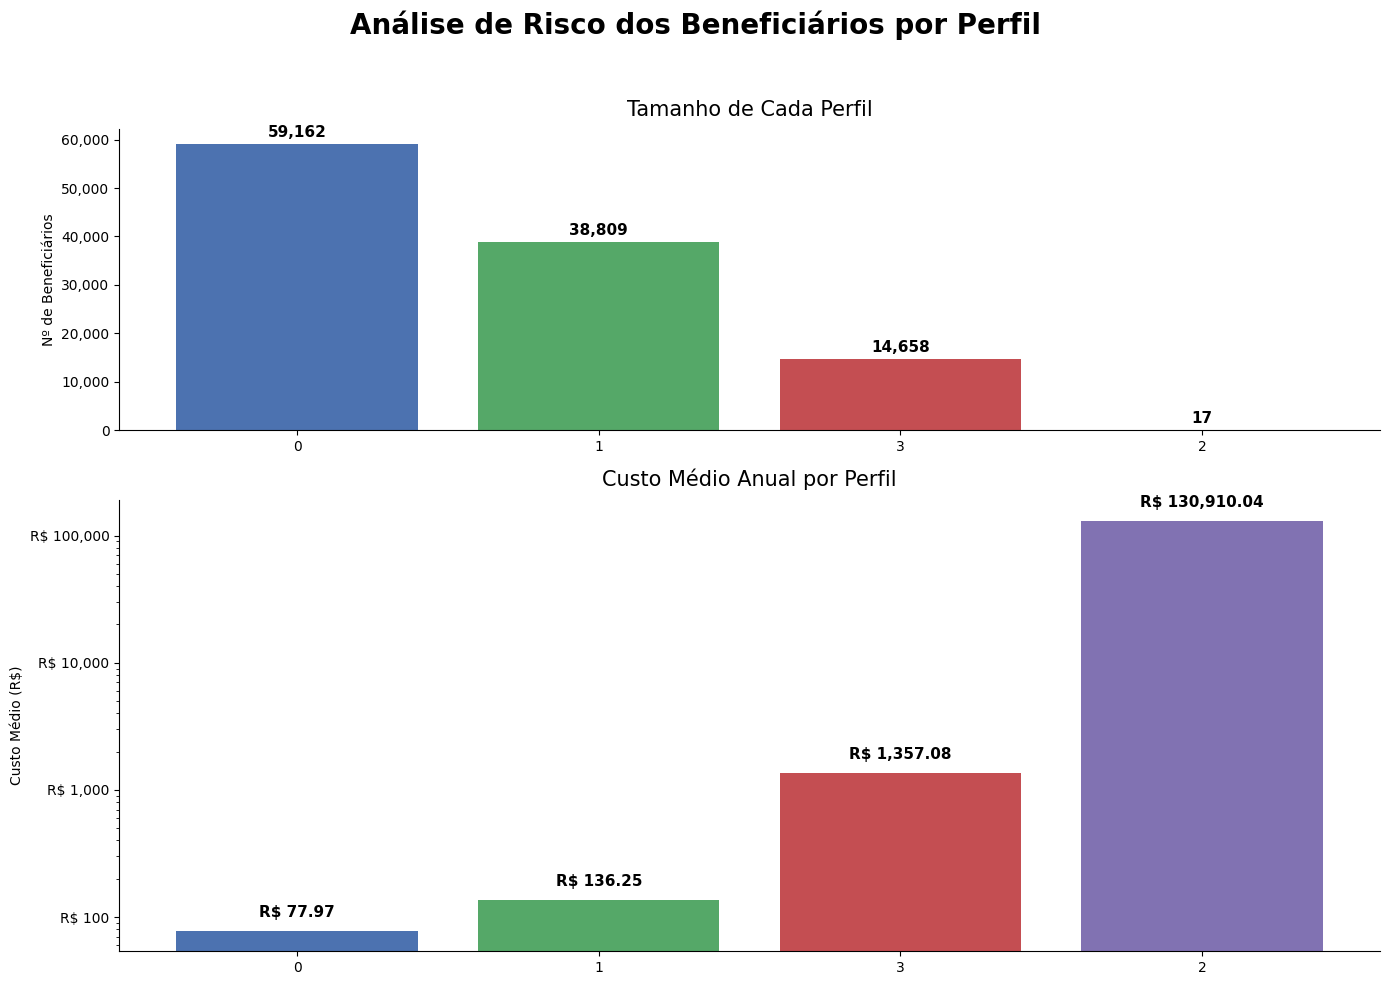

In [31]:
# Dashboard 1: Análise Completa dos Perfis de Risco
print("Gerando o Dashboard Principal de Análise de Perfis...")

# Preparar os dados para o dashboard
perfil_counts = df_master['perfil_risco'].value_counts()
custo_por_perfil = df_master.groupby('perfil_risco')['total_custo_plano'].mean()
df_analise = pd.DataFrame({
    'num_beneficiarios': perfil_counts,
    'custo_medio': custo_por_perfil
}).sort_values(by='num_beneficiarios', ascending=False)


# Criar a figura com 2 subplots (um em cima do outro)
fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(14, 10),
    gridspec_kw={'height_ratios': [1, 1.5]} # O gráfico de baixo é maior
)
fig.suptitle('Análise de Risco dos Beneficiários por Perfil', fontsize=20, weight='bold')


# ======================================================
# Gráfico 1 (Superior): Quantidade por Perfil
# ======================================================
ax[0].bar(
    df_analise.index.astype(str),
    df_analise['num_beneficiarios'],
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'] # Paleta de cores customizada
)

# Anotações e customização do Gráfico 1
ax[0].set_title('Tamanho de Cada Perfil', fontsize=15, pad=10)
ax[0].set_ylabel('Nº de Beneficiários')
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].bar_label(ax[0].containers[0], fmt='{:,.0f}', fontsize=11, weight='bold', padding=3)


# ======================================================
# Gráfico 2 (Inferior): Custo Médio por Perfil
# ======================================================
ax[1].bar(
    df_analise.index.astype(str),
    df_analise['custo_medio'],
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2']
)

# Anotações e customização do Gráfico 2
ax[1].set_title('Custo Médio Anual por Perfil', fontsize=15, pad=10)
ax[1].set_ylabel('Custo Médio (R$)')
ax[1].set_yscale('log') # Escala log é essencial aqui
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {int(x):,}'))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Anotação customizada para os valores de custo
for i, (valor, perfil_idx) in enumerate(zip(df_analise['custo_medio'], df_analise.index)):
    ax[1].annotate(f'R$ {valor:,.2f}',
                   (i, valor),
                   ha="center",
                   xytext=(0, 10),
                   textcoords="offset points",
                   fontsize=11,
                   fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta o layout para o supertítulo
plt.show()

# Matplotlib

Preparar visualizações das principais informações obtidas na base de dados apresentada pela UNIMED, como, por exemplo:
### - Evolução do número de beneficiários dos últimos anos 
### - Quantidade de beneficiários nos últimos anos que apresentam pelo menos uma DCNT e um segundo gráfico dos que não apresentaram. Utilizem dois eixos na mesma figura
### - Tempo médio de atendimento de beneficiários já diagnosticados com DCNT e que já fazem parte do programa de cuidados da UNIMED
### - Apresentar, em porcentagem, as principais características apresentadas por pacientes com DCNT 

Busquem extrair mais ***três principais informações da base*** e preparem, de acordo com as boas práticas de visualização de dados (ex: cores, tamanhos, gráficos comparativos, legenda, tipo de gráfico, usem legendas, títulos, o annotate entre outros recursos vistos nas aulas presenciais)



Gerando gráfico: Evolução de Beneficiários Ativos por Mês
Dados disponíveis de 2022-01 até 2023-12


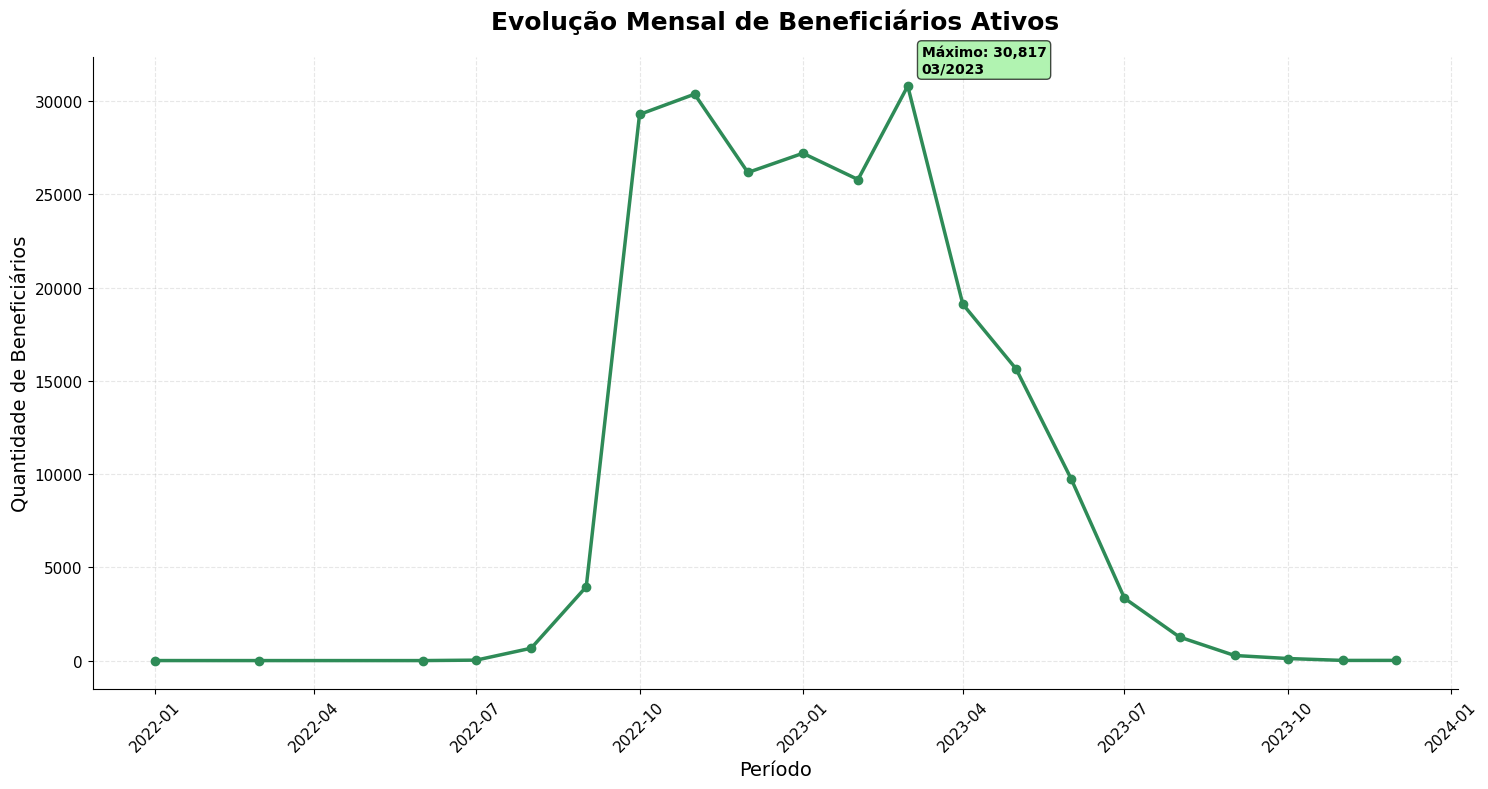


=== ESTATÍSTICAS DA EVOLUÇÃO MENSAL ===
Pico máximo: 30,817 beneficiários em March/2023
Valor mínimo: 2 beneficiários em March/2022
Média mensal: 10660 beneficiários
Variação total: 30,815 beneficiários
Tendência: CRESCIMENTO de 9 beneficiários no período


In [55]:
# Evolução do número de beneficiários mês a mês
print("\nGerando gráfico: Evolução de Beneficiários Ativos por Mês")

# Usar os dados originais que contêm dt_item
df_trans_plano = dataframes['df_benef_proc_plano'].copy()

# Converter dt_item para datetime se ainda não estiver
df_trans_plano['dt_item'] = pd.to_datetime(df_trans_plano['dt_item'])

# Criar coluna ano-mês
df_trans_plano['ano_mes'] = df_trans_plano['dt_item'].dt.to_period('M')

# Contar beneficiários únicos por mês
benef_por_mes = df_trans_plano.groupby('ano_mes')['id_beneficiario'].nunique()

# Filtrar período de interesse (2022-2024)
benef_por_mes = benef_por_mes.loc[(benef_por_mes.index >= '2022-01') & (benef_por_mes.index < '2025-01')]

print(f"Dados disponíveis de {benef_por_mes.index.min()} até {benef_por_mes.index.max()}")

# Converter índice para datetime para melhor plotagem
benef_por_mes.index = benef_por_mes.index.to_timestamp()

# Criar o gráfico de linha
plt.figure(figsize=(15, 8))
plt.plot(benef_por_mes.index, benef_por_mes.values, marker='o', linewidth=2.5, markersize=6, color="#2E8B57")

# Customização do gráfico
plt.title('Evolução Mensal de Beneficiários Ativos', fontsize=18, weight='bold', pad=20)
plt.ylabel('Quantidade de Beneficiários', fontsize=14)
plt.xlabel('Período', fontsize=14)

# Formatação do eixo X (datas)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Grid para melhor visualização
plt.grid(True, alpha=0.3, linestyle='--')

# Remover bordas superiores e direitas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionar anotações nos pontos extremos
max_idx = benef_por_mes.idxmax()
min_idx = benef_por_mes.idxmin()
max_val = benef_por_mes.max()
min_val = benef_por_mes.min()

plt.annotate(f'Máximo: {max_val:,}\n{max_idx.strftime("%m/%Y")}', 
             xy=(max_idx, max_val), xytext=(10, 10),
             textcoords='offset points', ha='left',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Estatísticas resumidas
print(f"\n=== ESTATÍSTICAS DA EVOLUÇÃO MENSAL ===")
print(f"Pico máximo: {max_val:,} beneficiários em {max_idx.strftime('%B/%Y')}")
print(f"Valor mínimo: {min_val:,} beneficiários em {min_idx.strftime('%B/%Y')}")
print(f"Média mensal: {benef_por_mes.mean():.0f} beneficiários")
print(f"Variação total: {max_val - min_val:,} beneficiários")

# Mostrar tendência (crescimento/decrescimento)
crescimento = benef_por_mes.iloc[-1] - benef_por_mes.iloc[0]
if crescimento > 0:
    print(f"Tendência: CRESCIMENTO de {crescimento:,} beneficiários no período")
elif crescimento < 0:
    print(f"Tendência: DECRESCIMENTO de {abs(crescimento):,} beneficiários no período")
else:
    print(f"Tendência: ESTÁVEL no período")


Gerando gráfico comparativo mensal detalhado: DCNT vs. Não DCNT


/tmp/ipykernel_27809/918440023.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_evolucao_dcnt['possui_dcnt'].fillna(False, inplace=True)
/tmp/ipykernel_27809/918440023.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_evolucao_dcnt['possui_dcnt'].fillna(False, inplace=True)


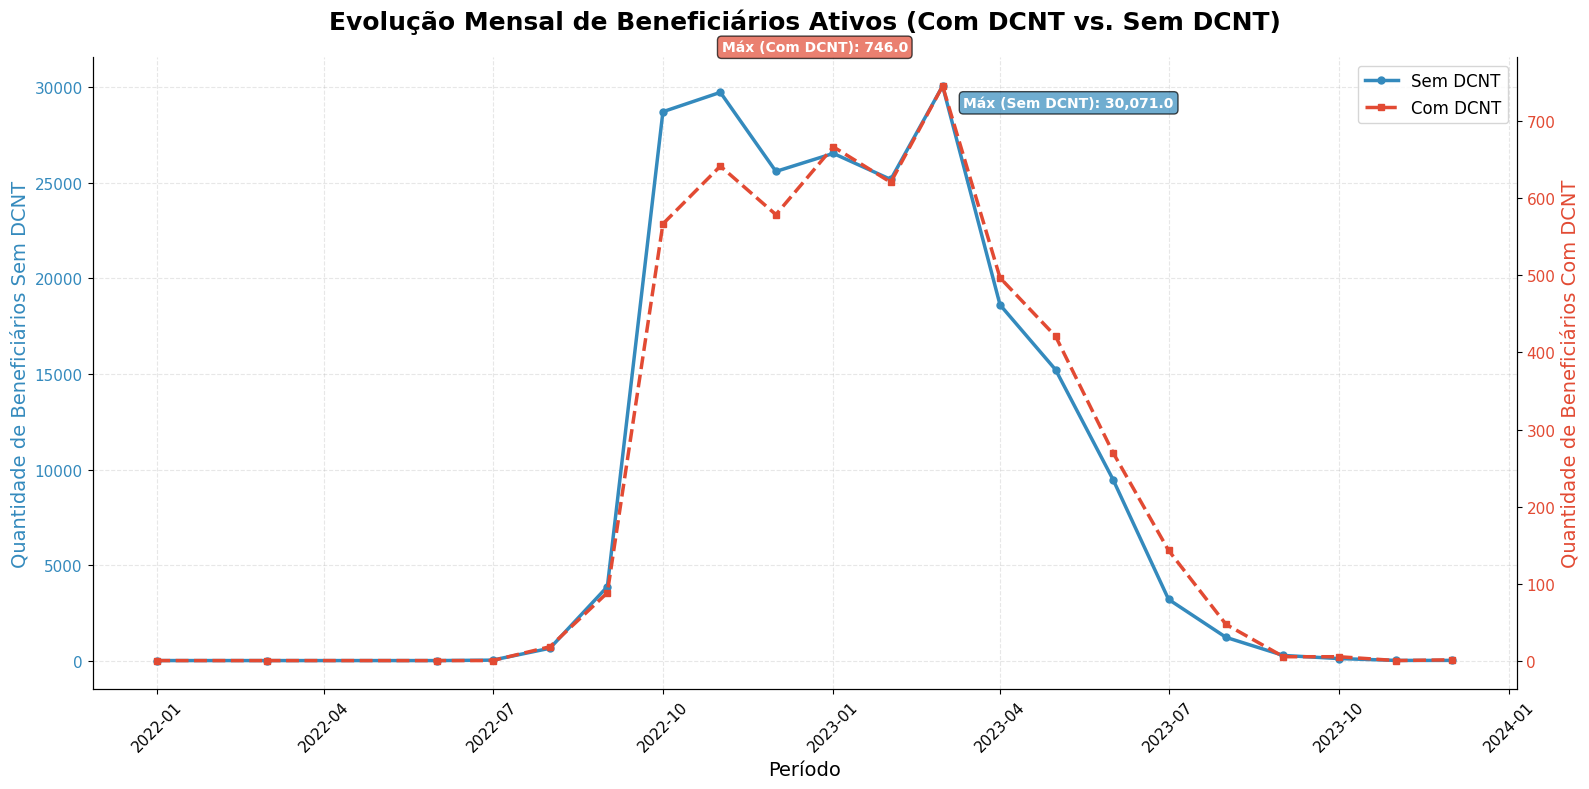


=== ESTATÍSTICAS DO GRUPO SEM DCNT ===
Pico máximo: 30,071.0 beneficiários em March de 2023
Valor mínimo: 2.0 beneficiários em March de 2022
Média mensal: 10407 beneficiários
Tendência no período: +8.0 beneficiários

=== ESTATÍSTICAS DO GRUPO COM DCNT ===
Pico máximo: 746.0 beneficiários em March de 2023
Média mensal: 253 beneficiários
Tendência no período: +1.0 beneficiários


In [63]:
# Gráfico Comparativo Mensal: Com DCNT vs. Sem DCNT (no estilo solicitado)
print("\nGerando gráfico comparativo mensal detalhado: DCNT vs. Não DCNT")

# --- 1. Preparação dos Dados (a mesma lógica anterior) ---
df_evolucao_dcnt = pd.merge(
    df_trans_plano,
    df_master[['id_beneficiario', 'possui_dcnt']],
    on='id_beneficiario',
    how='left'
)
df_evolucao_dcnt['possui_dcnt'].fillna(False, inplace=True)
df_evolucao_dcnt['ano_mes'] = df_evolucao_dcnt['dt_item'].dt.to_period('M')
contagem_mensal_dcnt = df_evolucao_dcnt.groupby(['ano_mes', 'possui_dcnt'])['id_beneficiario'].nunique().unstack().fillna(0)
contagem_mensal_dcnt.columns = ['Sem DCNT', 'Com DCNT']
contagem_mensal_dcnt = contagem_mensal_dcnt.loc[(contagem_mensal_dcnt.index >= '2022-01') & (contagem_mensal_dcnt.index < '2025-01')]
contagem_mensal_dcnt.index = contagem_mensal_dcnt.index.to_timestamp()

# Separar as séries para facilitar o cálculo das estatísticas
sem_dcnt_series = contagem_mensal_dcnt['Sem DCNT']
com_dcnt_series = contagem_mensal_dcnt['Com DCNT']

# --- 2. Criação do Gráfico com a Estética Solicitada ---
fig, ax1 = plt.subplots(figsize=(16, 8))

# Linha 1: Beneficiários SEM DCNT (eixo da esquerda)
color1 = '#348ABD' # Azul
ax1.plot(sem_dcnt_series.index, sem_dcnt_series.values, marker='o', linewidth=2.5, markersize=5, color=color1, label='Sem DCNT')
ax1.set_xlabel('Período', fontsize=14)
ax1.set_ylabel('Quantidade de Beneficiários Sem DCNT', fontsize=14, color=color1)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=11)
ax1.tick_params(axis='x', rotation=45, labelsize=11)

# Linha 2: Beneficiários COM DCNT (eixo da direita)
ax2 = ax1.twinx()
color2 = '#E24A33' # Vermelho
ax2.plot(com_dcnt_series.index, com_dcnt_series.values, marker='s', linewidth=2.5, markersize=5, linestyle='--', color=color2, label='Com DCNT')
ax2.set_ylabel('Quantidade de Beneficiários Com DCNT', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=11)

# --- 3. Customização e Anotações (no estilo do exemplo) ---
plt.title('Evolução Mensal de Beneficiários Ativos (Com DCNT vs. Sem DCNT)', fontsize=18, weight='bold', pad=20)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Anotações para a linha "Sem DCNT"
max_idx1, max_val1 = sem_dcnt_series.idxmax(), sem_dcnt_series.max()
min_idx1, min_val1 = sem_dcnt_series.idxmin(), sem_dcnt_series.min()
ax1.annotate(f'Máx (Sem DCNT): {max_val1:,}', xy=(max_idx1, max_val1), xytext=(15, -15),
             textcoords='offset points', ha='left',
             bbox=dict(boxstyle='round,pad=0.3', fc=color1, alpha=0.7),
             fontsize=10, fontweight='bold', color='white')

# Anotações para a linha "Com DCNT"
max_idx2, max_val2 = com_dcnt_series.idxmax(), com_dcnt_series.max()
min_idx2, min_val2 = com_dcnt_series.idxmin(), com_dcnt_series.min()
ax2.annotate(f'Máx (Com DCNT): {max_val2:,}', xy=(max_idx2, max_val2), xytext=(-25, 25),
             textcoords='offset points', ha='right',
             bbox=dict(boxstyle='round,pad=0.3', fc=color2, alpha=0.7),
             fontsize=10, fontweight='bold', color='white')
# Legenda unificada
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best', fontsize=12)

plt.tight_layout()
plt.show()

# --- 4. Estatísticas Resumidas para Ambos os Grupos ---
print("\n" + "="*40)
print("=== ESTATÍSTICAS DO GRUPO SEM DCNT ===")
print("="*40)
print(f"Pico máximo: {sem_dcnt_series.max():,} beneficiários em {sem_dcnt_series.idxmax().strftime('%B de %Y')}")
print(f"Valor mínimo: {sem_dcnt_series.min():,} beneficiários em {sem_dcnt_series.idxmin().strftime('%B de %Y')}")
print(f"Média mensal: {sem_dcnt_series.mean():.0f} beneficiários")
crescimento1 = sem_dcnt_series.iloc[-1] - sem_dcnt_series.iloc[0]
print(f"Tendência no período: {crescimento1:+,} beneficiários") # O sinal + mostra crescimento

print("\n" + "="*40)
print("=== ESTATÍSTICAS DO GRUPO COM DCNT ===")
print("="*40)
print(f"Pico máximo: {com_dcnt_series.max():,} beneficiários em {com_dcnt_series.idxmax().strftime('%B de %Y')}")
print(f"Média mensal: {com_dcnt_series.mean():.0f} beneficiários")
crescimento2 = com_dcnt_series.iloc[-1] - com_dcnt_series.iloc[0]
print(f"Tendência no período: {crescimento2:+,} beneficiários")

=== ANÁLISE DE TEMPO DE INTERNAÇÃO PARA PACIENTES COM DCNT ===

1. Identificando pacientes com DCNT...
✓ Encontrados 6996 pacientes únicos com diagnósticos de DCNT
✓ Marcados 3963 beneficiários como portadores de DCNT

2. Analisando internações...
✓ Analisando 1844 internações de pacientes com DCNT

=== RESULTADOS ===
Tempo médio de internação (DCNT): 1.69 dias
Tempo mediano de internação (DCNT): 1.00 dias
Internação mais longa: 92 dias
Internação mais curta: 0 dias


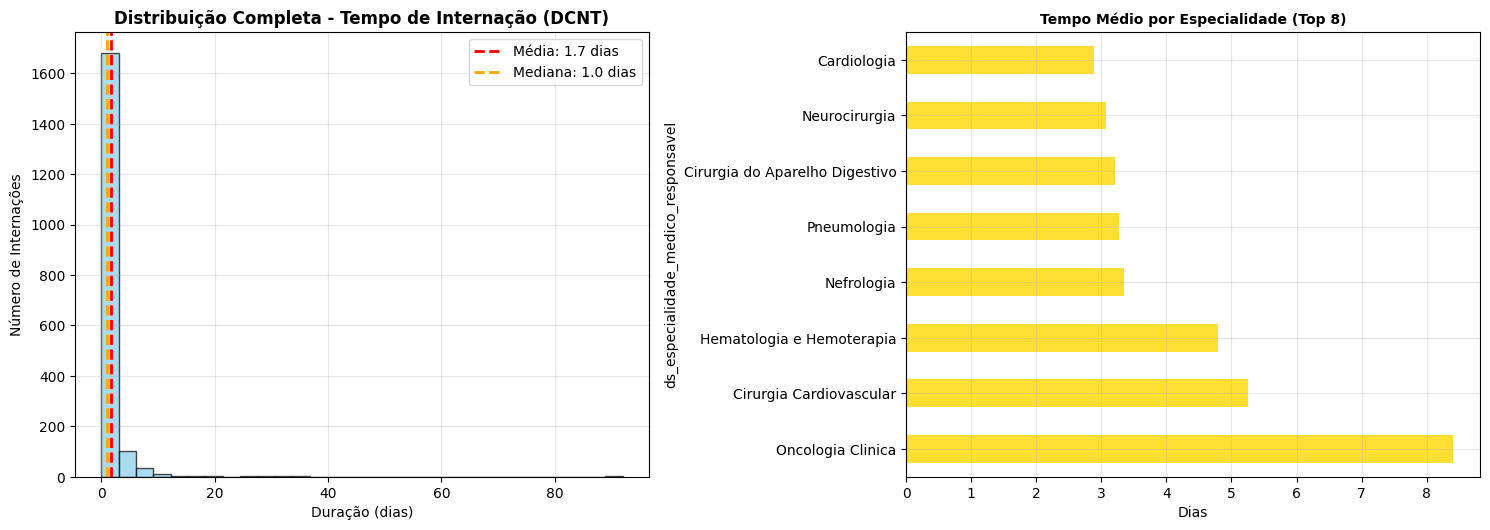


=== COMPARAÇÃO ===
Tempo médio geral (todos pacientes): 1.80 dias
Diferença DCNT vs Geral: -0.11 dias

Perfil das internações (DCNT):
- Internações curtas (≤3 dias): 91.1%
- Internações longas (>10 dias): 1.2%


In [34]:
# Tempo médio de atendimento de beneficiários já diagnosticados com DCNT
print("=== ANÁLISE DE TEMPO DE INTERNAÇÃO PARA PACIENTES COM DCNT ===")

# PASSO 1: Identificar pacientes com DCNT
print("\n1. Identificando pacientes com DCNT...")

# Obter pacientes que têm diagnósticos relacionados à linha de cuidado (DCNT)
pacientes_linha_cuidado = set(dataframes['df_atend_hgu_cid']['nr_atendimento'].unique())

# Obter atendimentos que são da linha de cuidado
atendimentos_dcnt = dataframes['df_atend_hgu_cid']['nr_atendimento'].unique()

# Obter id_paciente dos atendimentos com DCNT
pacientes_com_dcnt = dataframes['df_atend_hgu'][
    dataframes['df_atend_hgu']['nr_atendimento'].isin(atendimentos_dcnt)
]['id_paciente'].unique()

print(f"✓ Encontrados {len(pacientes_com_dcnt)} pacientes únicos com diagnósticos de DCNT")

# PASSO 2: Criar coluna 'possui_dcnt' no df_master
df_master['possui_dcnt'] = df_master['id_paciente'].isin(pacientes_com_dcnt)

print(f"✓ Marcados {df_master['possui_dcnt'].sum()} beneficiários como portadores de DCNT")

# PASSO 3: Analisar internações de pacientes com DCNT
print("\n2. Analisando internações...")

# Fazer merge entre atendimentos hospitalares e informação de DCNT
internacoes_dcnt = pd.merge(
    dataframes['df_atend_hgu'], 
    df_master[['id_paciente', 'possui_dcnt']], 
    on='id_paciente', 
    how='inner'
)

# Filtrar apenas pacientes com DCNT e internações
internacoes_dcnt = internacoes_dcnt[
    (internacoes_dcnt['possui_dcnt'] == True) & 
    (internacoes_dcnt['ds_tipo_atendimento'] == 'Internado')
].copy()

# Calcular duração da internação
internacoes_dcnt['duracao_dias'] = (internacoes_dcnt['dt_alta'] - internacoes_dcnt['dt_entrada']).dt.days

# Filtrar valores válidos (0 a 365 dias)
internacoes_dcnt = internacoes_dcnt[
    internacoes_dcnt['duracao_dias'].between(0, 365)
]

print(f"✓ Analisando {len(internacoes_dcnt)} internações de pacientes com DCNT")

# PASSO 4: Calcular estatísticas
if len(internacoes_dcnt) > 0:
    tempo_medio_internacao = internacoes_dcnt['duracao_dias'].mean()
    tempo_mediano = internacoes_dcnt['duracao_dias'].median()
    tempo_max = internacoes_dcnt['duracao_dias'].max()
    tempo_min = internacoes_dcnt['duracao_dias'].min()
    
    print(f"\n=== RESULTADOS ===")
    print(f"Tempo médio de internação (DCNT): {tempo_medio_internacao:.2f} dias")
    print(f"Tempo mediano de internação (DCNT): {tempo_mediano:.2f} dias")
    print(f"Internação mais longa: {tempo_max} dias")
    print(f"Internação mais curta: {tempo_min} dias")
    
    # PASSO 5: Visualização
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Histograma geral
    plt.subplot(2, 2, 1)
    plt.hist(internacoes_dcnt['duracao_dias'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(tempo_medio_internacao, color='red', linestyle='--', linewidth=2, label=f'Média: {tempo_medio_internacao:.1f} dias')
    plt.axvline(tempo_mediano, color='orange', linestyle='--', linewidth=2, label=f'Mediana: {tempo_mediano:.1f} dias')
    plt.title('Distribuição Completa - Tempo de Internação (DCNT)', fontsize=12, weight='bold')
    plt.xlabel('Duração (dias)')
    plt.ylabel('Número de Internações')
    plt.legend()
    plt.grid(True, alpha=0.3)
    

    # Subplot 2: Estatísticas por especialidade
    plt.subplot(2, 2, 2)
    if 'ds_especialidade_medico_responsavel' in internacoes_dcnt.columns:
        tempo_por_especialidade = internacoes_dcnt.groupby('ds_especialidade_medico_responsavel')['duracao_dias'].mean().sort_values(ascending=False).head(8)
        tempo_por_especialidade.plot(kind='barh', color='gold', alpha=0.8)
        plt.title('Tempo Médio por Especialidade (Top 8)', fontsize=10, weight='bold')
        plt.xlabel('Dias')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Comparação com população geral
    print(f"\n=== COMPARAÇÃO ===")
    # Calcular tempo médio para todos os pacientes
    todas_internacoes = dataframes['df_atend_hgu'][
        dataframes['df_atend_hgu']['ds_tipo_atendimento'] == 'Internado'
    ].copy()
    todas_internacoes['duracao_dias'] = (todas_internacoes['dt_alta'] - todas_internacoes['dt_entrada']).dt.days
    todas_internacoes = todas_internacoes[todas_internacoes['duracao_dias'].between(0, 365)]
    
    tempo_medio_geral = todas_internacoes['duracao_dias'].mean()
    print(f"Tempo médio geral (todos pacientes): {tempo_medio_geral:.2f} dias")
    print(f"Diferença DCNT vs Geral: {tempo_medio_internacao - tempo_medio_geral:+.2f} dias")
    
    # Percentual de internações curtas vs longas
    internacoes_curtas_pct = (len(internacoes_dcnt[internacoes_dcnt['duracao_dias'] <= 3]) / len(internacoes_dcnt)) * 100
    internacoes_longas_pct = (len(internacoes_dcnt[internacoes_dcnt['duracao_dias'] > 10]) / len(internacoes_dcnt)) * 100
    
    print(f"\nPerfil das internações (DCNT):")
    print(f"- Internações curtas (≤3 dias): {internacoes_curtas_pct:.1f}%")
    print(f"- Internações longas (>10 dias): {internacoes_longas_pct:.1f}%")

else:
    print("❌ Nenhuma internação encontrada para pacientes com DCNT")


Analisando as características percentuais dos pacientes com DCNT (Gráficos Verticais)


/tmp/ipykernel_27809/3012336770.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perfil_counts.index.astype(str), y=perfil_counts.values, ax=axes[0], palette='viridis')
/tmp/ipykernel_27809/3012336770.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, ax=axes[1], palette='magma')


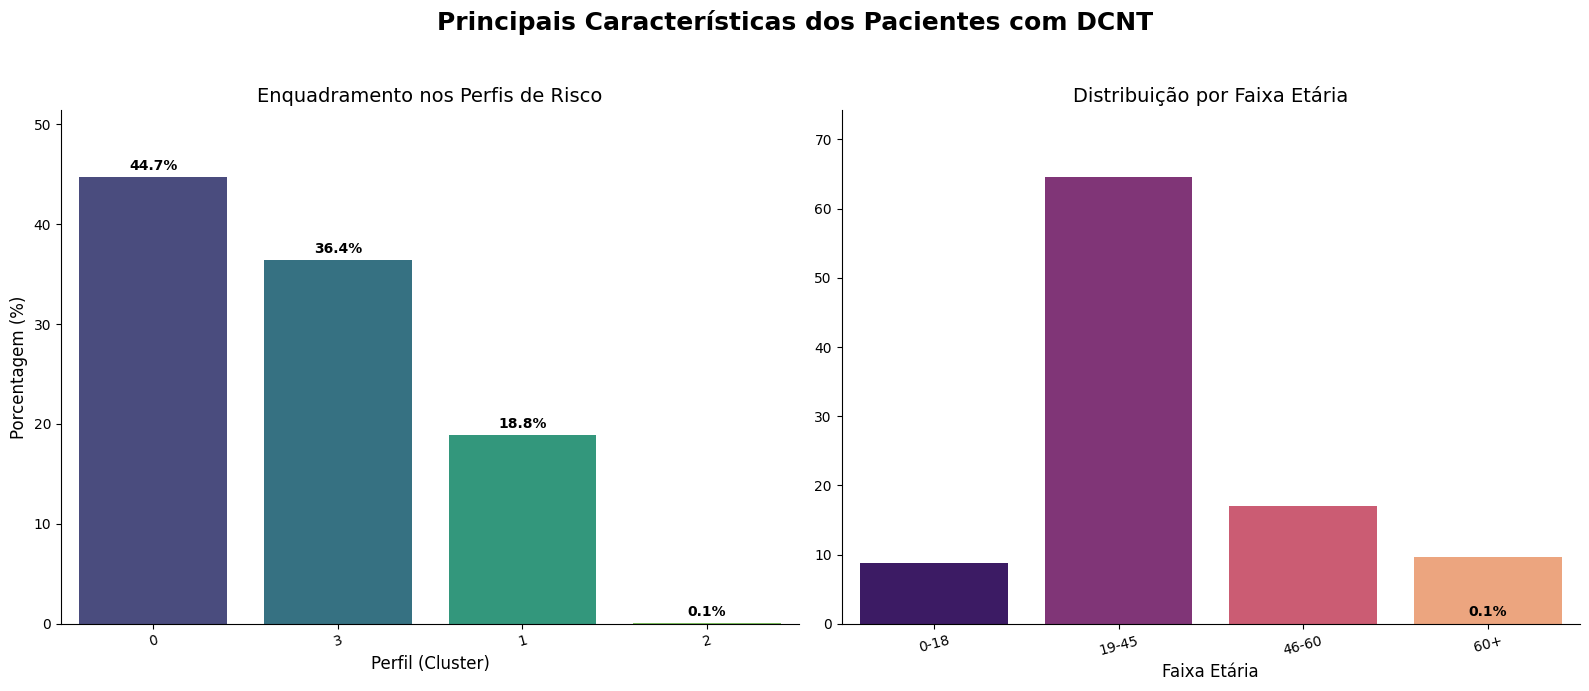

In [35]:
# Apresentar, em porcentagem, as principais características por pacientes com DCNT (VERTICAL COM LABELS CORRIGIDOS)
print("\nAnalisando as características percentuais dos pacientes com DCNT (Gráficos Verticais)")
df_dcnt = df_master[df_master['possui_dcnt'] == True].copy()

if not df_dcnt.empty:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Principais Características dos Pacientes com DCNT', fontsize=18, weight='bold')

    perfil_counts = df_dcnt['perfil_risco'].value_counts(normalize=True).mul(100)
    sns.barplot(x=perfil_counts.index.astype(str), y=perfil_counts.values, ax=axes[0], palette='viridis')
    
    axes[0].set_title('Enquadramento nos Perfis de Risco', fontsize=14)
    axes[0].set_xlabel('Perfil (Cluster)', fontsize=12)
    axes[0].set_ylabel('Porcentagem (%)', fontsize=12)
    axes[0].set_ylim(0, perfil_counts.max() * 1.15) # Espaço extra para o rótulo
    
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.1f%%', padding=3, fontsize=10, weight='bold')

    bins = [0, 18, 45, 60, 120]; labels = ['0-18', '19-45', '46-60', '60+']
    df_dcnt['faixa_etaria'] = pd.cut(df_dcnt['idade_calculada'], bins=bins, labels=labels)
    faixa_etaria_counts = df_dcnt['faixa_etaria'].value_counts(normalize=True).mul(100)
    
    sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, ax=axes[1], palette='magma')
    
    axes[1].set_title('Distribuição por Faixa Etária', fontsize=14)
    axes[1].set_xlabel('Faixa Etária', fontsize=12)
    axes[1].set_ylabel('')
    axes[1].set_ylim(0, faixa_etaria_counts.max() * 1.15) # Espaço extra para o rótulo
    
    axes[1].bar_label(container, fmt='%.1f%%', padding=3, fontsize=10, weight='bold')

    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', rotation=15)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

else:
    print("Nenhum paciente com DCNT identificado para análise.")

## Extrair mais 3 principais informações da base e elaborem os gráficos para visualizá-las. Cada código em uma célula separada

=== ANÁLISE DE CONCENTRAÇÃO DE CUSTOS ===
Total de beneficiários com custos: 33,420
Custo total: R$ 32,017,778.44
Top 10% dos beneficiários = 54.2% dos custos
Top 20% dos beneficiários = 68.7% dos custos
Top 30% dos beneficiários = 78.1% dos custos


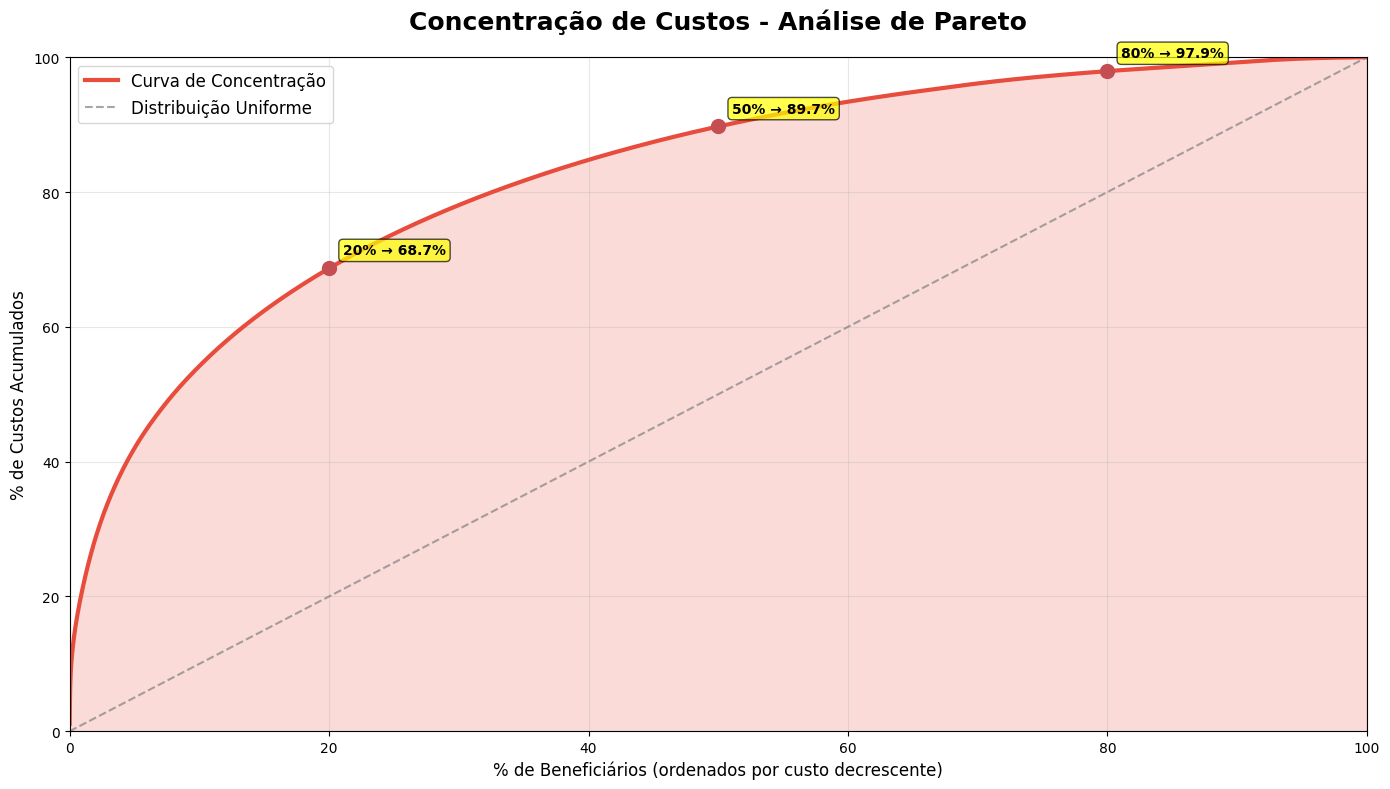


=== INSIGHTS PRINCIPAIS ===
📊 Top 20% dos beneficiários consomem 68.7% dos recursos
💰 Custo médio do Top 20%: R$ 3,290.24
💰 Custo médio geral: R$ 958.04

=== ANÁLISE DE OUTLIERS ===
🔥 Top 1% dos beneficiários consomem 21.2% dos recursos
💸 Custo médio do Top 1%: R$ 20,343.04
📈 Maior custo individual: R$ 350,069.58


In [36]:
# Análise 1: Concentração de Custos - Princípio de Pareto (80/20)
print("=== ANÁLISE DE CONCENTRAÇÃO DE CUSTOS ===")

# Filtrar apenas beneficiários com custo > 0
df_com_custo = df_master[df_master['total_custo_plano'] > 0].copy()

# Ordenar por custo decrescente
df_com_custo = df_com_custo.sort_values('total_custo_plano', ascending=False)

# Calcular percentuais acumulados
df_com_custo['custo_acumulado'] = df_com_custo['total_custo_plano'].cumsum()

# CORREÇÃO: Converter range para list ou usar numpy.arange
import numpy as np
df_com_custo['pct_beneficiarios'] = np.arange(1, len(df_com_custo) + 1) / len(df_com_custo) * 100
df_com_custo['pct_custo_acumulado'] = df_com_custo['custo_acumulado'] / df_com_custo['total_custo_plano'].sum() * 100

# Encontrar pontos chave (10%, 20%, etc.)
pontos_chave = [10, 20, 30]
custo_total = df_com_custo['total_custo_plano'].sum()

print(f"Total de beneficiários com custos: {len(df_com_custo):,}")
print(f"Custo total: R$ {custo_total:,.2f}")

for pct in pontos_chave:
    idx = int(len(df_com_custo) * pct / 100)
    custo_acum = df_com_custo.iloc[:idx]['total_custo_plano'].sum()
    pct_custo = (custo_acum / custo_total) * 100
    print(f"Top {pct}% dos beneficiários = {pct_custo:.1f}% dos custos")

# Criar o gráfico
plt.figure(figsize=(14, 8))

# Gráfico principal - Curva de Pareto
plt.plot(df_com_custo['pct_beneficiarios'], df_com_custo['pct_custo_acumulado'], 
         linewidth=3, color='#E74C3C', label='Curva de Concentração')

# Linha de referência (distribuição uniforme)
plt.plot([0, 100], [0, 100], linestyle='--', color='gray', alpha=0.7, label='Distribuição Uniforme')

# Destacar pontos importantes
for pct in [20, 50, 80]:
    idx = int(len(df_com_custo) * pct / 100)
    if idx < len(df_com_custo):  # Verificação de segurança
        y_val = df_com_custo.iloc[idx]['pct_custo_acumulado']
        plt.plot(pct, y_val, 'o', markersize=10, color='#C44E52')
        plt.annotate(f'{pct}% → {y_val:.1f}%', 
                    (pct, y_val), xytext=(10, 10),
                    textcoords='offset points', 
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    fontsize=10, fontweight='bold')

plt.title('Concentração de Custos - Análise de Pareto', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('% de Beneficiários (ordenados por custo decrescente)', fontsize=12)
plt.ylabel('% de Custos Acumulados', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 100)
plt.ylim(0, 100)

# Adicionar área sombreada para destacar concentração
plt.fill_between(df_com_custo['pct_beneficiarios'], 
                df_com_custo['pct_custo_acumulado'], 
                alpha=0.2, color='#E74C3C')

plt.tight_layout()
plt.show()

# Insights específicos
top_20_idx = int(len(df_com_custo) * 0.2)
top_20_pct_custo = df_com_custo.iloc[:top_20_idx]['total_custo_plano'].sum()
pct_top_20 = (top_20_pct_custo / custo_total) * 100

print(f"\n=== INSIGHTS PRINCIPAIS ===")
print(f"📊 Top 20% dos beneficiários consomem {pct_top_20:.1f}% dos recursos")
print(f"💰 Custo médio do Top 20%: R$ {df_com_custo.iloc[:top_20_idx]['total_custo_plano'].mean():,.2f}")
print(f"💰 Custo médio geral: R$ {df_com_custo['total_custo_plano'].mean():,.2f}")

# Análise adicional de outliers
print(f"\n=== ANÁLISE DE OUTLIERS ===")
top_1_pct = df_com_custo.iloc[:int(len(df_com_custo)*0.01)]
if len(top_1_pct) > 0:
    custo_top_1 = top_1_pct['total_custo_plano'].sum()
    pct_top_1 = (custo_top_1 / custo_total) * 100
    print(f"🔥 Top 1% dos beneficiários consomem {pct_top_1:.1f}% dos recursos")
    print(f"💸 Custo médio do Top 1%: R$ {top_1_pct['total_custo_plano'].mean():,.2f}")
    print(f"📈 Maior custo individual: R$ {df_com_custo['total_custo_plano'].max():,.2f}")

=== ANÁLISE DE UTILIZAÇÃO POR ESPECIALIDADE MÉDICA ===
Total de atendimentos analisados: 395,717
Especialidades com maior volume:


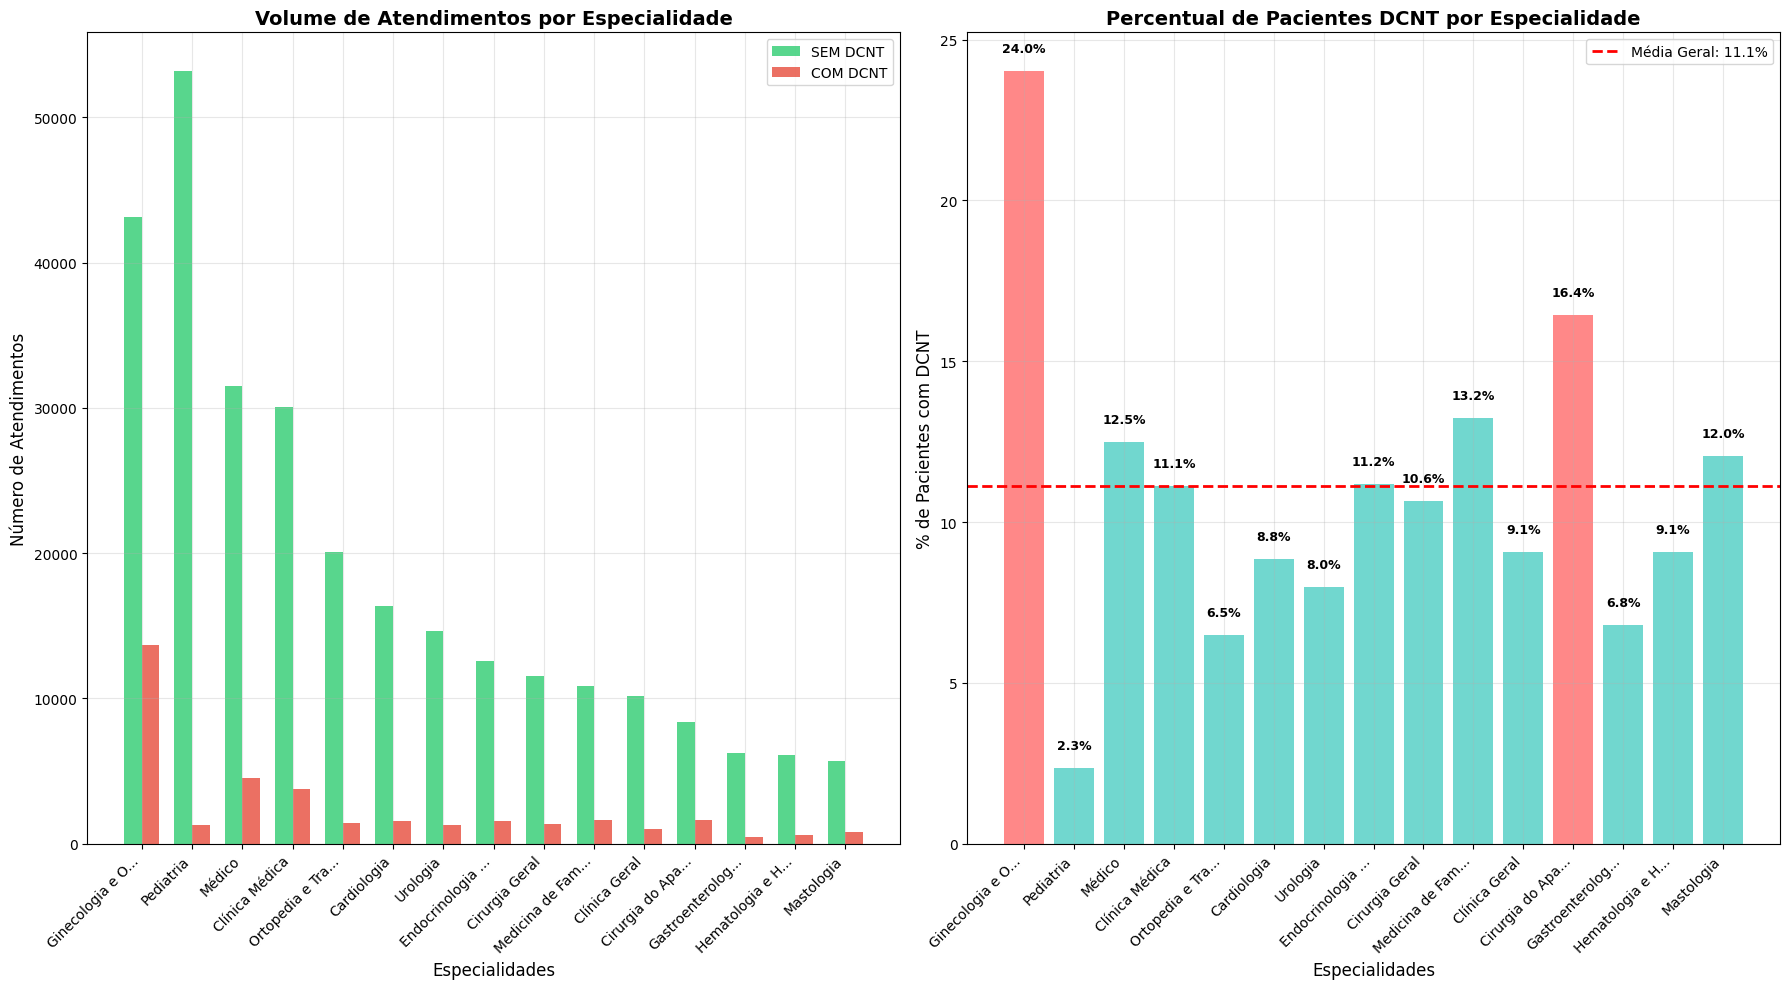


=== ESPECIALIDADES COM MAIOR CONCENTRAÇÃO DE DCNT ===
1. Ginecologia e Obstetrícia: 24.0% DCNT (13646.0 de 56794.0 atendimentos)
2. Cirurgia do Aparelho Digestivo: 16.4% DCNT (1642.0 de 9990.0 atendimentos)
3. Medicina de Família e Comunidade: 13.2% DCNT (1656.0 de 12503.0 atendimentos)
4. Médico: 12.5% DCNT (4499.0 de 36012.0 atendimentos)
5. Mastologia: 12.0% DCNT (781.0 de 6484.0 atendimentos)

=== ESPECIALIDADES COM MAIOR VOLUME TOTAL ===
1. Ginecologia e Obstetrícia: 56,794.0 atendimentos (24.0% DCNT)
2. Pediatria: 54,463.0 atendimentos (2.3% DCNT)
3. Médico: 36,012.0 atendimentos (12.5% DCNT)
4. Clínica Médica: 33,823.0 atendimentos (11.1% DCNT)
5. Ortopedia e Traumatologia: 21,481.0 atendimentos (6.5% DCNT)


In [37]:
# Análise 2: Utilização por Especialidade Médica - DCNT vs Não-DCNT
print("=== ANÁLISE DE UTILIZAÇÃO POR ESPECIALIDADE MÉDICA ===")

# Usar dados de atendimentos hospitalares com especialidades
df_atend_especialidade = dataframes['df_atend_hgu'][
    dataframes['df_atend_hgu']['ds_especialidade_medico_responsavel'].notna()
].copy()

# Fazer merge com informações de DCNT
df_atend_especialidade = pd.merge(
    df_atend_especialidade,
    df_master[['id_paciente', 'possui_dcnt']],
    on='id_paciente',
    how='inner'
)

# Agrupar por especialidade e status DCNT
especialidade_dcnt = df_atend_especialidade.groupby(['ds_especialidade_medico_responsavel', 'possui_dcnt']).size().unstack(fill_value=0)
especialidade_dcnt.columns = ['SEM DCNT', 'COM DCNT']

# Calcular totais e percentuais
especialidade_dcnt['TOTAL'] = especialidade_dcnt['SEM DCNT'] + especialidade_dcnt['COM DCNT']
especialidade_dcnt['PCT_DCNT'] = (especialidade_dcnt['COM DCNT'] / especialidade_dcnt['TOTAL']) * 100

# Filtrar apenas especialidades com volume significativo (top 15)
top_especialidades = especialidade_dcnt.nlargest(15, 'TOTAL')

print(f"Total de atendimentos analisados: {df_atend_especialidade.shape[0]:,}")
print(f"Especialidades com maior volume:")

# Criar gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Gráfico 1: Volume por especialidade
x_pos = range(len(top_especialidades))
width = 0.35

ax1.bar([p - width/2 for p in x_pos], top_especialidades['SEM DCNT'], 
        width, label='SEM DCNT', color='#2ECC71', alpha=0.8)
ax1.bar([p + width/2 for p in x_pos], top_especialidades['COM DCNT'], 
        width, label='COM DCNT', color='#E74C3C', alpha=0.8)

ax1.set_title('Volume de Atendimentos por Especialidade', fontsize=14, fontweight='bold')
ax1.set_xlabel('Especialidades', fontsize=12)
ax1.set_ylabel('Número de Atendimentos', fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels([esp[:15] + '...' if len(esp) > 15 else esp 
                     for esp in top_especialidades.index], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Percentual de DCNT por especialidade
cores_barras = ['#FF6B6B' if pct > 15 else '#4ECDC4' for pct in top_especialidades['PCT_DCNT']]

bars = ax2.bar(x_pos, top_especialidades['PCT_DCNT'], color=cores_barras, alpha=0.8)
ax2.set_title('Percentual de Pacientes DCNT por Especialidade', fontsize=14, fontweight='bold')
ax2.set_xlabel('Especialidades', fontsize=12)
ax2.set_ylabel('% de Pacientes com DCNT', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([esp[:15] + '...' if len(esp) > 15 else esp 
                     for esp in top_especialidades.index], rotation=45, ha='right')

# Adicionar linha de referência (média geral)
media_dcnt = (df_atend_especialidade['possui_dcnt'].sum() / len(df_atend_especialidade)) * 100
ax2.axhline(media_dcnt, color='red', linestyle='--', linewidth=2, 
           label=f'Média Geral: {media_dcnt:.1f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras do gráfico 2
for bar, valor in zip(bars, top_especialidades['PCT_DCNT']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{valor:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Insights detalhados
print(f"\n=== ESPECIALIDADES COM MAIOR CONCENTRAÇÃO DE DCNT ===")
top_dcnt_especialidades = top_especialidades.nlargest(5, 'PCT_DCNT')
for idx, (esp, row) in enumerate(top_dcnt_especialidades.iterrows(), 1):
    print(f"{idx}. {esp}: {row['PCT_DCNT']:.1f}% DCNT ({row['COM DCNT']} de {row['TOTAL']} atendimentos)")

print(f"\n=== ESPECIALIDADES COM MAIOR VOLUME TOTAL ===")
top_volume_especialidades = top_especialidades.nlargest(5, 'TOTAL')
for idx, (esp, row) in enumerate(top_volume_especialidades.iterrows(), 1):
    print(f"{idx}. {esp}: {row['TOTAL']:,} atendimentos ({row['PCT_DCNT']:.1f}% DCNT)")

Gerando visualização final com amostragem estratificada para garantir a visualização de todos os custos...
Amostra criada com 5648 pontos (100% dos perfis pequenos e 5.0% dos perfis grandes).


/tmp/ipykernel_27809/2043049362.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grandes_amostra = df_grandes.groupby(coluna_perfil, group_keys=False).apply(lambda x: x.sample(frac=frac_grandes, random_state=42))


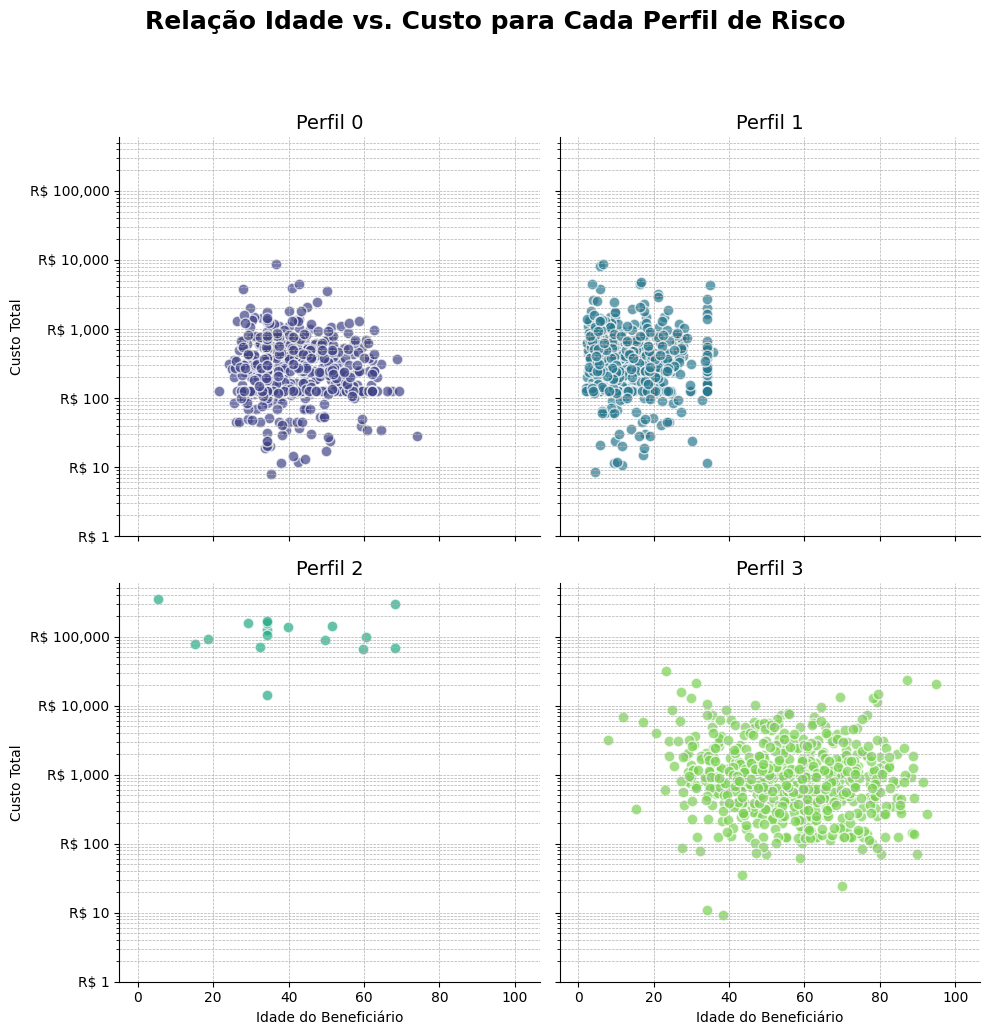

In [42]:
# Gráfico Extra 3 Final: Relação Idade vs. Custo (com Amostragem Estratificada)
print("Gerando visualização final com amostragem estratificada para garantir a visualização de todos os custos...")

import matplotlib.ticker as mticker

# =========================================================================
# === LÓGICA DE AMOSTRAGEM ESTRATIFICADA INTELIGENTE ===
# =========================================================================
# Função para criar a amostra inteligente
def criar_amostra_inteligente(df, coluna_perfil='perfil_risco', frac_grandes=0.05):
    # Identifica os grupos pequenos (ex: menos de 100 membros)
    contagem_perfis = df[coluna_perfil].value_counts()
    perfis_pequenos = contagem_perfis[contagem_perfis < 100].index
    
    # Pega 100% dos membros dos grupos pequenos
    df_pequenos_completo = df[df[coluna_perfil].isin(perfis_pequenos)]
    
    # Pega uma fração dos membros dos grupos grandes
    perfis_grandes = contagem_perfis[contagem_perfis >= 100].index
    df_grandes = df[df[coluna_perfil].isin(perfis_grandes)]
    df_grandes_amostra = df_grandes.groupby(coluna_perfil, group_keys=False).apply(lambda x: x.sample(frac=frac_grandes, random_state=42))
    
    # Combina as duas partes em uma amostra final
    df_amostra_final = pd.concat([df_pequenos_completo, df_grandes_amostra], ignore_index=True)
    print(f"Amostra criada com {len(df_amostra_final)} pontos (100% dos perfis pequenos e {frac_grandes*100}% dos perfis grandes).")
    return df_amostra_final

# Criar a amostra usando a função
df_intel_sample = criar_amostra_inteligente(df_master)

# =========================================================================
# === PLOTAGEM USANDO A NOVA AMOSTRA ===
# =========================================================================
g = sns.lmplot(
    data=df_intel_sample, # Usando a nova amostra inteligente
    x='idade_calculada',
    y='total_custo_plano',
    hue='perfil_risco',
    col='perfil_risco',
    col_wrap=2,
    palette='viridis',
    fit_reg=False,
    scatter_kws={'alpha':0.7, 'edgecolor':'w', 's': 60}
)

# Melhorias de Visualização
g.fig.suptitle('Relação Idade vs. Custo para Cada Perfil de Risco', fontsize=18, weight='bold', y=1.03)
g.set_axis_labels("Idade do Beneficiário", "Custo Total")

# Aplicar escala de log e formatação do eixo Y em Reais (R$)
for ax, title in zip(g.axes.flatten(), g.col_names):
    # Reordenar os títulos para corresponder aos plots
    perfil_title = f'Perfil {title}'
    ax.set_title(perfil_title, fontsize=14)
    ax.set_yscale('log')
    ax.set_ylim(bottom=1)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    formatter = mticker.FuncFormatter(lambda x, p: f'R$ {int(x):,}')
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()